In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**LOAD INBUILT DATA SET OF HANDWRITTEN DIGITS.**

In [ ]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

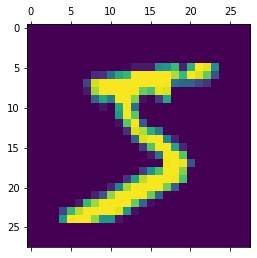

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flatten = x_train.reshape((len(x_train),28*28))

In [ ]:
x_test_flatten = x_test.reshape((len(x_test),28*28))

In [ ]:
x_train_flatten.shape

(60000, 784)

**MODEL CREATION WITH SINGLE LAYER**

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4679 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9258


CHECKING ACCURACY OF MODEL

In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9249


[0.26717880368232727, 0.9248999953269958]

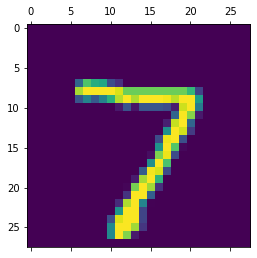

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

array([2.3166060e-02, 4.0672447e-07, 4.1810185e-02, 9.5886803e-01,
       1.4696419e-03, 1.0288587e-01, 1.1049151e-06, 9.9976373e-01,
       7.8831285e-02, 6.0455453e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

**SHOWING ERRORS WITH HELP OF CONFUSION MATRIX**

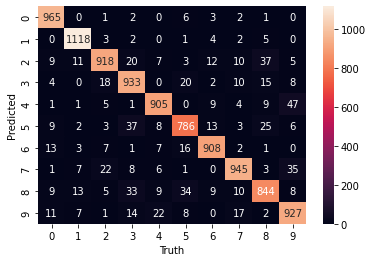

In [ ]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

**ADDING HIDDEN LAYER TO MODEL AND CHECKING ACCURACY**

In [ ]:
model = keras.Sequential([
                  
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2783 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9833


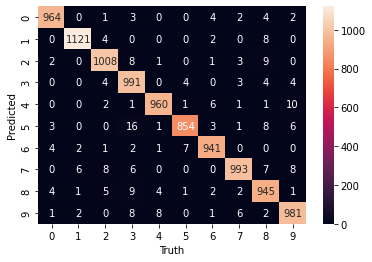

In [ ]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()